<a href="https://colab.research.google.com/github/gppooja/gppooja/blob/main/Student_Performance_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Study Performance-Linear Regression**








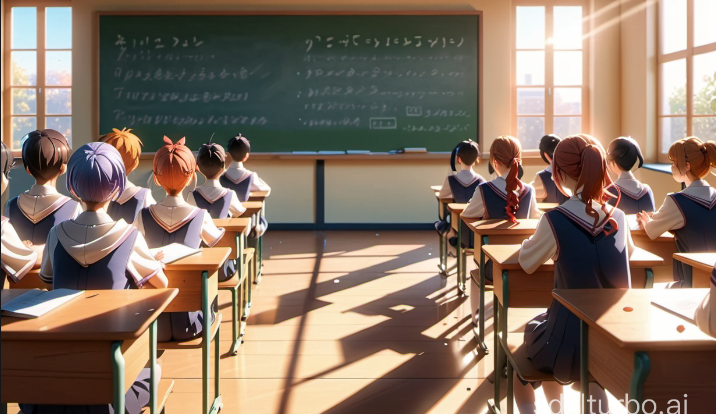

**The following topics are covered in this tutorial:**

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

## Problem Statement


We are going to analyze a study performance dataset To discover insights about how the students performs in exams.**you're tasked with creating an automated system to estimate the annual Total Score of new students**, using information such as their parental level of education,test preparation course,math score,reading score,writing score.



You're given a [CSV file](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) containing verified historical data, consisting of the aforementioned information and the total score of 1000 students.
> 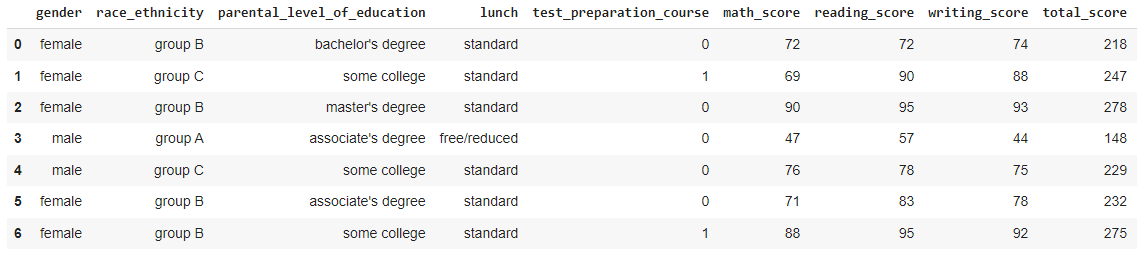


Estimates from your system will be used to determine the total score of the student. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.



## Downloading the Data

To begin, let's download the data using the `urlretrieve` function from `urllib.request`.
You can find the official analysis of the data here:
 https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

 There are several options for getting a dataset


*   Download the CSV manually and upload it
*   Use the `opendatasets` library to download datasets from Kaggle datasets and Google Drive URLs

In [ ]:
!pip install numpy


In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od

In [ ]:
url='https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset'


In [ ]:
url

'https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset'

In [ ]:
od.download(url)

Skipping, found downloaded files in "./loan-approval-prediction-dataset" (use force=True to force download)


In [ ]:
import opendatasets as od

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [ ]:
data=pd.read_csv("/content/study_performance.csv")

In [ ]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']


In [ ]:
data.head(7)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275


The dataset contains 1000 rows and 8 columns. Each row of the dataset contains information about one student.

Our objective is to find a way to estimate the value in the "total score" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate the total score for new students too, simply by asking for information like their parental_level_of_education , test_preparation_course, math_score, reading_score, total_score and writing_score.

Let's check the data type for each column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   total_score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Looks like "gender", "race_ethnicity", "parental level of education","lunch","test preparation course" are strings and "math score","reading score","writing score"are numbers.None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [ ]:
data.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "total score" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


In [ ]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score'],
      dtype='object')

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "total score" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
data.nunique()


,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77
total_score,194


In [ ]:
data.isnull().sum()


,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
total_score,0


In [ ]:
data.gender.value_counts()

,count
gender,
female,518
male,482


### Reading Score

Reading Score is a numeric column. The minimum score in the dataset is 17 and the maximum score is 100. Thus, we can visualize the distribution of score using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [ ]:
data.reading_score.describe()

,reading_score
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


In [ ]:
fig = px.histogram(data,
                   x = 'reading_score',
                   marginal='box',
                   title='Reading Score Distribution')
fig.update_layout(bargap=0.05)
fig.show()

This distribution shows that most students received reading scores between 60 and 85.Few students obtained  100 marks, and even fewer received less than 40.

### Writing Score

In this the minimum writing score in the dataset is 10 and the maximum score is 100. Thus, we can visualize the distribution of score using a histogram and a box plot.

In [ ]:
data.writing_score.describe()

,writing_score
count,1000.000000
mean,68.054000
std,15.195657
min,10.000000
25%,57.750000
50%,69.000000
75%,79.000000
max,100.000000


In [ ]:
fig = px.histogram(data,
                   x = 'writing_score',
                   marginal='box',
                   title='Writing Score Distribution')
fig.update_layout(bargap=0.05)
fig.show()

Based on this distribution, the majority of students writing scores fell between 55 to 80.only 14 students scored 100, and even fewer scored lower than 40.

### Math Score

In this the minimum writing score in the dataset is 0 and the maximum score is 100. Thus, we can visualize the distribution of score using a histogram and a box plot.

In [ ]:
data.math_score.describe()

,math_score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [ ]:
fig = px.histogram(data,
                   x = 'math_score',
                   marginal='box',
                   title='math Score Distribution')
fig.update_layout(bargap=0.05)
fig.show()

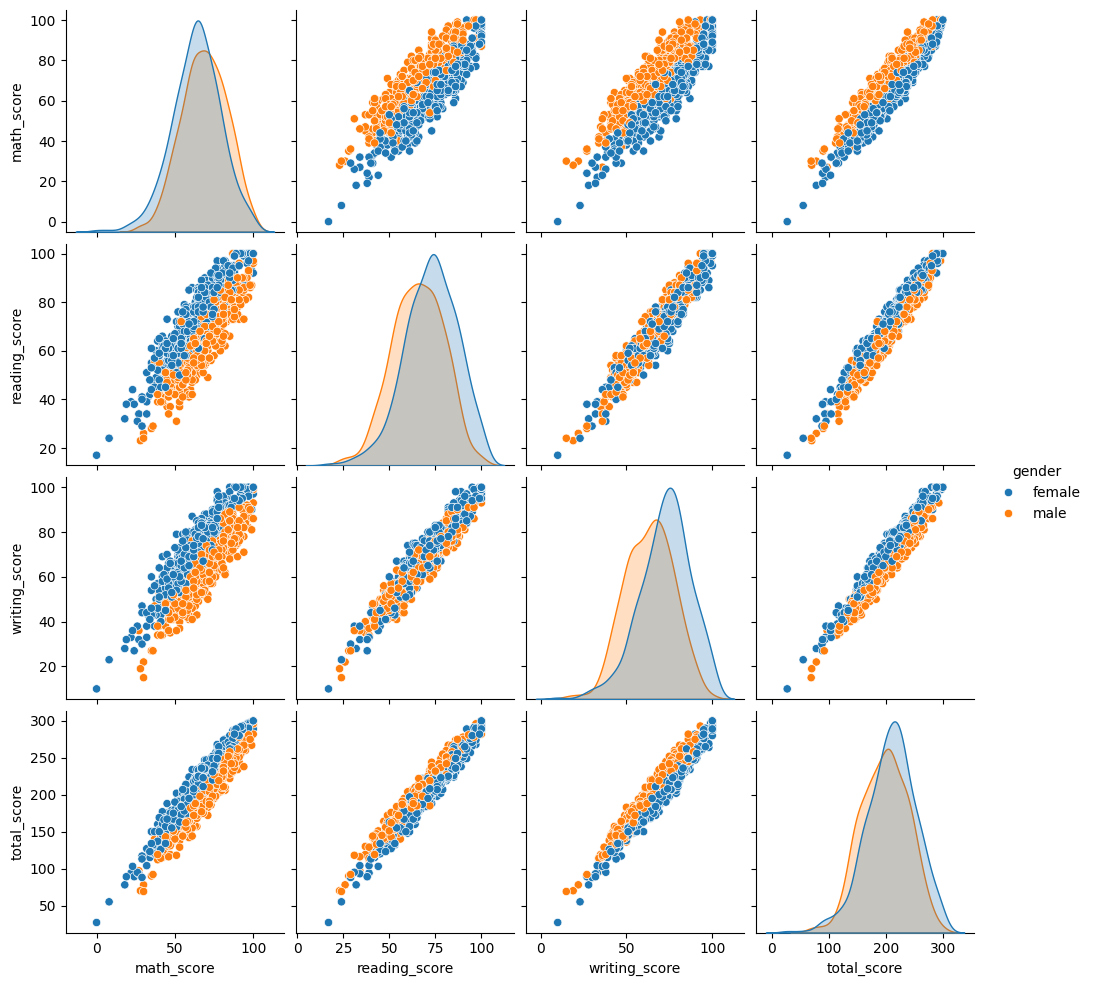

In [ ]:
sns.pairplot(data,hue = 'gender')
plt.show()


This is a data visualization tool that creates a matrix of scatterplots, showing pairwise relationships between variables in a dataset, aiding in visualizing correlations and distributions.here we observe correlations between the reading score ,writing score,math score and total score.



### Total Score

Let's visualize the distribution of "total score"(this score include math score,reading score and writing score) . This is the column we're trying to predict. Let's also use the categorical column "gender" to distinguish the total score for female students and male students.

<Axes: xlabel='total_score', ylabel='Count'>

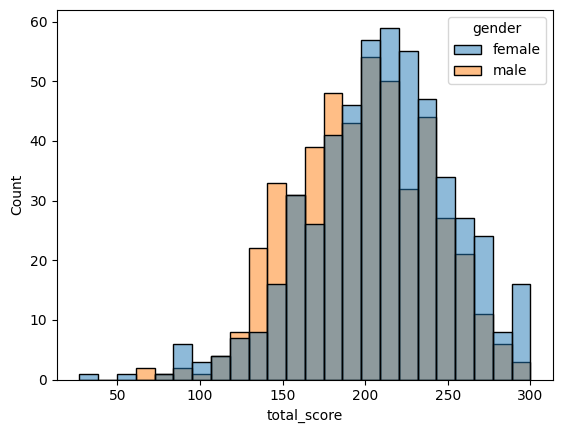

In [ ]:
sns.histplot(data,x='total_score',hue='gender')

In [ ]:
fig = px.histogram(data,
                   x = 'total_score',
                   title='Total Score Distribution',
                   color='parental_level_of_education')
fig.update_layout(bargap=0.05)
fig.show()

This demonstrates the distribution of the overall score and distinguishes the educational level of the parents.

The histogram will show how frequently each score (or range of scores) appears in the dataset.
This parameter breaks down the histogram bars by different categories within the parental_level_of_education column. Each category (e.g., high school, college, master's degree, etc.) will be represented by different colors, allowing you to see how total scores vary with the parental education level.








Having looked at individual columns, we can now visualize the relationship between "total score" (the value we wish to predict) and other columns.

### Total Score and Writing Score

Let's visualize the relationship between "total score" and "writing score" using a scatter plot. Each point in the scatter plot represents one student. We'll also use values in the "test preparation course" column to color the points.

In [ ]:
px.scatter(data,
           x ='writing_score',
           y = 'total_score',
           color='test_preparation_course',
           title = 'Total Score VS Writing Score')


 In this case, the writing_score represents the score achieved in a writing test or assessment.the total score, possibly the sum of scores from different tests (e.g., writing, reading, and math scores).
 'Test_preparation_course' This defines the color of the points in the plot based on the 'test_preparation_course' column, which likely indicates whether a student has completed a preparation course. The scatter plot will show different colors for different categories (e.g., students who took the course versus those who didn't).


This clearly explains the relationship being visualized, which is between the total score and the writing score.



In [ ]:
px.histogram(data, x='gender',color='test_preparation_course')


### Total Score and Reading Score

Let's visualize the relationship between "total score" and "reading score" using a scatter plot. Each point in the scatter plot represents one student. We'll also use values in the "gender" column to color the points.

In [ ]:
px.scatter(data,
           x ='reading_score',
           y = 'total_score',
           color='gender',
           title = 'total score VS reading score')

This is the score achieved by students in a reading test.The represents the total_score, likely the sum of multiple test scores (e.g., reading, writing, and math). This shows how the total score correlates with the reading score.


The points in the scatter plot are colored based on the gender column. This will help visually differentiate the data based on gender, showing if there is any observable trend or difference between male and female students in terms of their reading and total scores.


To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [ ]:
data['test_preparation_course']=data['test_preparation_course'].replace({'none':0,'completed':1})

<ipython-input-129-f8671e53ff5d>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
data['test_preparation']=data['test_preparation_course'].replace({0:'none',1:'completed'})

In [ ]:
data.test_preparation_course.value_counts()

,count
test_preparation_course,
0,642
1,358


### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "total score" compared to other columns. E.g. "writing score" and "total score" seem to grow together, whereas "math score" and "total score" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [ ]:
data.total_score.corr(data.math_score)

0.9187457588383453

In [ ]:
data.total_score.corr(data.reading_score)

0.9703306887176945

In [ ]:
data.total_score.corr(data.writing_score)

0.9656672374542071

In [ ]:
data.total_score.corr(data.test_preparation_course)

0.2567097066562229


Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [ ]:
data.test_preparation_course.value_counts()

,count
test_preparation_course,
0,642
1,358


In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,test_preparation
0,female,group B,bachelor's degree,standard,0,72,72,74,218,none
1,female,group C,some college,standard,1,69,90,88,247,completed
2,female,group B,master's degree,standard,0,90,95,93,278,none
3,male,group A,associate's degree,free/reduced,0,47,57,44,148,none
4,male,group C,some college,standard,0,76,78,75,229,none


## Linear Regression using a Single Feature

We now know that the "test_preparation" and "writing_score" columns have the strongest correlation with "total_score". Let's try to find a way of estimating the value of "total_score" using the value of "Writing_score" for test preparation completed. First, let's create a data frame containing just the data for test preparation completed students.

In [ ]:
px.scatter(data,
           x ='writing_score',
           y = 'total_score',color='test_preparation',
           title = 'Total Score VS Writing Score')

In [ ]:
df=data[data['test_preparation']=='completed']

In [ ]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,test_preparation
1,female,group C,some college,standard,1,69,90,88,247,completed
6,female,group B,some college,standard,1,88,95,92,275,completed
8,male,group D,high school,free/reduced,1,64,64,67,195,completed
13,male,group A,some college,standard,1,78,72,70,220,completed
18,male,group C,master's degree,free/reduced,1,46,42,46,134,completed


Next, let's visualize the relationship between "writing_score" and "total_score"

In [ ]:
px.scatter(df,
           x ='writing_score',
           y = 'total_score',
           title = 'company VS salary')

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict total score for a given writing score. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept").

### Model

In the above case, the x axis shows "writing score" and the y axis shows "total score". Thus, we're assuming the following relationship between the two:

$charges = w \times writing score + b$

We'll try determine $w$ and $b$ for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "writing score" and "total score" as a straight line.

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "writing score" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "total score".

Let define a helper function `estimate_total score`, to compute $total score$, given $writing score$, $w$ and $b$.


In [ ]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'test_preparation'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder =LabelEncoder()


In [ ]:
def estimate_total_score(writing_score, w, b):
  return w * writing_score + b

The `estimate_total_score` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for total_score.

In [ ]:
w = 2
b = 50

In [ ]:
writing_scores = df.writing_score

In [ ]:
writing_scores = df.writing_score
estimated_total_scored = estimate_total_score(writing_scores, w, b)

We can plot the estimated charges using a line graph.

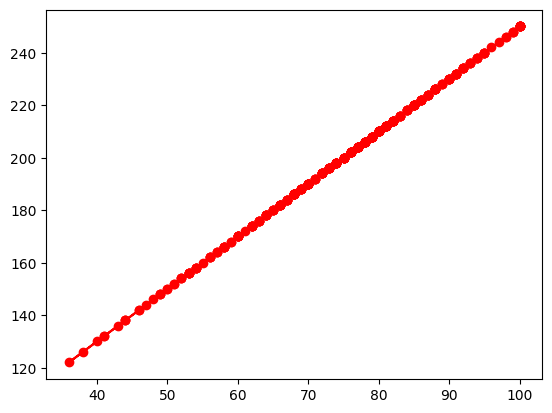

In [ ]:
plt.plot(writing_scores,estimated_total_scored, 'r-o')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

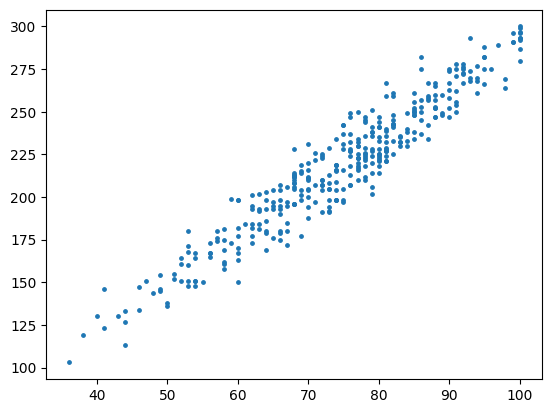

In [ ]:
target = df.total_score
plt.scatter(writing_scores,target,s=6)

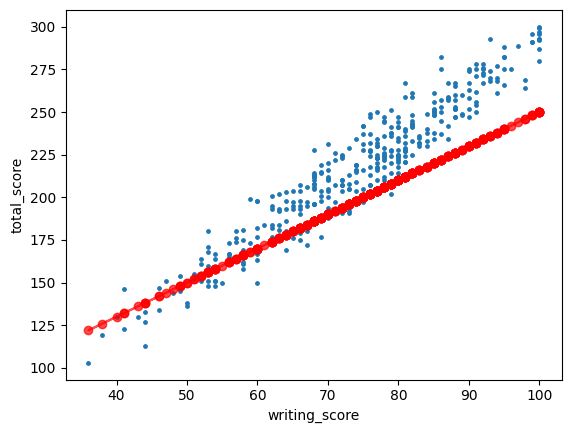

In [ ]:
target = df.total_score
plt.plot(writing_scores,estimated_total_scored, 'r-o',alpha=0.7)
plt.scatter(writing_scores,target,s=6)
plt.xlabel('writing_score');
plt.ylabel("total_score");

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [ ]:
def try_parameters(w, b):
  writing_scores = df.writing_score
  target = df.total_score

  estimated_total_scored = estimate_total_score(writing_scores, w, b)

  plt.plot(writing_scores,estimated_total_scored, 'r-o',alpha=0.7)
  plt.scatter(writing_scores,target,s=6)
  plt.xlabel('writing_scores');
  plt.ylabel("total_scores");

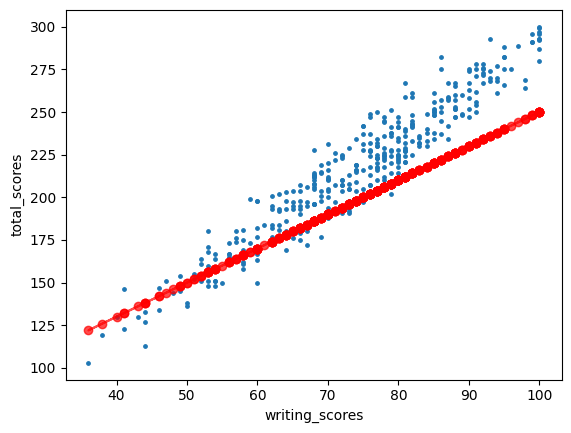

In [ ]:
try_parameters(2, 50)

 As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "writing score" and "total score".

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "writing score" and "total score"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w=2
b=50

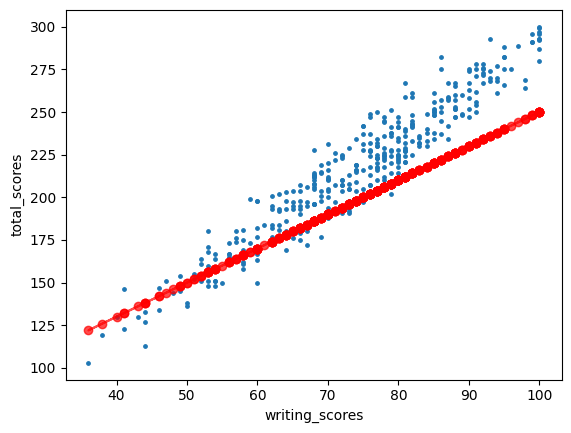

In [ ]:
try_parameters(w,b)

Let's compute the RMSE for our model with a sample set of weights

In [ ]:
targets = df['total_score']
predicted = estimate_total_score(df.writing_score, w, b)

In [ ]:
rmse(targets, predicted)

24.68873264371974

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by 24.68*.

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [ ]:
def try_parameters(w, b):
    writing_scores = df.writing_score
    target = df.total_score
    predictions = estimate_total_score(writing_scores, w, b)

    plt.plot(writing_scores, predictions, 'r', alpha=0.9);
    plt.scatter(writing_scores, target, s=8,alpha=0.8);
    plt.xlabel('writing_score');
    plt.ylabel('total_score')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 12.52910354950385


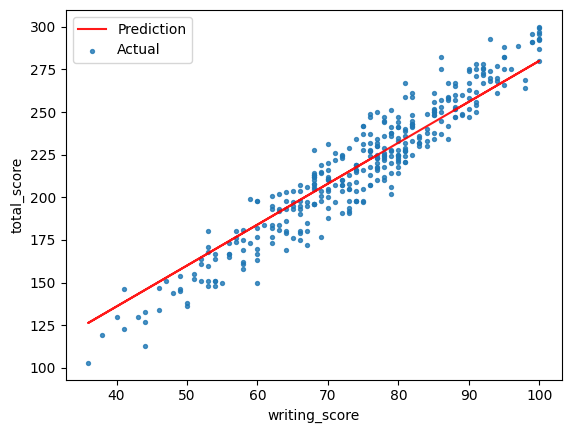

In [ ]:
try_parameters(2.4, 40)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: (better for smaller datasets)
* Stochastic gradient descent: (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?



In [ ]:
inputs=df[['writing_score']]
targets=df.total_score

In [ ]:
print(inputs,targets)

     writing_score
1               88
6               92
8               67
13              70
18              46
..             ...
990             75
991             78
995             95
997             65
998             77

[358 rows x 1 columns] 1      247
6      275
8      195
13     220
18     134
      ... 
990    242
991    225
995    282
997    195
998    223
Name: total_score, Length: 358, dtype: int64


### Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you.

In [ ]:
from sklearn.linear_model import LinearRegression

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "writing score" vs. "total score" using the ordinary least squares optimization technique.

First, we create a new model object.

In [ ]:
model=LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

Let's fit the model to the data.

In [ ]:
model.fit(inputs,targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the total score for the writing score 30

In [ ]:
model.predict(np.array([[30]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([93.70493885])

Let compute the predictions for the entire set of inputs

In [ ]:
predictions=model.predict(inputs)

In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
rmse(targets, predictions)

11.32702299631716

Seems like our prediction is off by 11 on average, which is not too bad considering the fact that there are several outliers.

In [ ]:
model.predict(np.array([[41],[50]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([124.48766749, 149.67353637])

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [ ]:
model.intercept_

9.752042560412605

In [ ]:
model.coef_

array([2.79842988])

Let's visualize the line created by the above parameters.

RMSE LOSS: 11.32702299631716


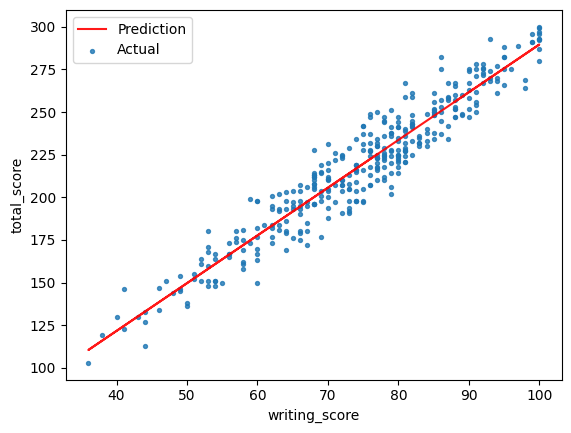

In [ ]:
try_parameters(model.coef_, model.intercept_)

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

## Linear Regression using Multiple Features

So far, we've used on the "writing score" feature to estimate "total score". Adding another feature like "reading score" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times writingscore + w_2 \times readingscore + b$

We need to change just one line of code to include the reading score.

In [ ]:
inputs, targets = df[['writing_score','reading_score','math_score']], df['total_score']


In [ ]:
model = LinearRegression().fit(inputs, targets)


In [ ]:
predictions = model.predict(inputs)


In [ ]:
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6.402157925214357e-14


In [ ]:
model.coef_, model.intercept_

(array([1., 1., 1.]), -8.526512829121202e-14)

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,test_preparation
29,female,group D,master's degree,standard,0,62,70,75,207,none
535,female,group C,bachelor's degree,free/reduced,1,66,83,83,232,completed
695,female,group D,some college,free/reduced,0,79,89,86,254,none
557,male,group C,master's degree,free/reduced,0,61,67,66,194,none
836,male,group E,high school,standard,0,73,64,57,194,none
...,...,...,...,...,...,...,...,...,...,...
106,female,group D,master's degree,standard,0,87,100,100,287,none
270,male,group C,bachelor's degree,standard,0,69,63,61,193,none
860,female,group C,associate's degree,standard,0,53,62,53,168,none
435,male,group C,some college,free/reduced,1,50,48,53,151,completed


In [ ]:
test_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,test_preparation
521,female,group C,associate's degree,standard,0,91,86,84,261,none
737,female,group B,some college,free/reduced,1,53,66,73,192,completed
740,male,group D,bachelor's degree,standard,0,80,73,72,225,none
660,male,group C,some college,free/reduced,0,74,77,73,224,none
411,male,group E,some college,standard,1,84,83,78,245,completed


In [ ]:
train_inputs = train_df.iloc[:,:10]
train_targets = train_df['total_score']
test_inputs = test_df.iloc[:,:10]
test_targets = test_df['total_score']

In [ ]:
train_inputs.drop(columns=['total_score'],axis=1,inplace=True)
test_inputs.drop(columns=['total_score'],axis=1,inplace=True)

In [ ]:
print('train_df.shape:',train_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (800, 10)
test_df.shape: (200, 10)


In [ ]:
input_cols = list(train_df.columns)[1:-2]
target_col = "total_score"

In [ ]:
print(input_cols)

['race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


In [ ]:
print(target_col)

total_score


In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
29,group D,master's degree,standard,0,62,70,75
535,group C,bachelor's degree,free/reduced,1,66,83,83
695,group D,some college,free/reduced,0,79,89,86
557,group C,master's degree,free/reduced,0,61,67,66
836,group E,high school,standard,0,73,64,57
...,...,...,...,...,...,...,...
106,group D,master's degree,standard,0,87,100,100
270,group C,bachelor's degree,standard,0,69,63,61
860,group C,associate's degree,standard,0,53,62,53
435,group C,some college,free/reduced,1,50,48,53


In [ ]:
train_targets

,total_score
29,207
535,232
695,254
557,194
836,194
...,...
106,287
270,193
860,168
435,151
